In [201]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

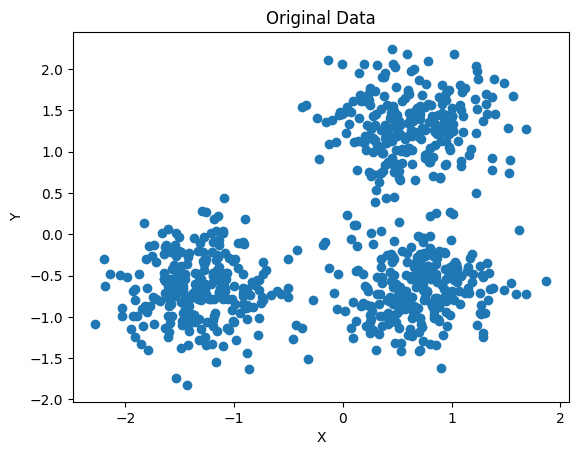

In [202]:
# generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
random_state = np.random.RandomState(0)
X, labels_true = make_blobs(
    n_samples=750, 
    centers=centers, 
    cluster_std=0.4,
    random_state=random_state
)
X = StandardScaler().fit_transform(X)
_ = plt.scatter(X[:, 0], X[:, 1])
_ = plt.title('Original Data')
_ = plt.xlabel('X')
_ = plt.ylabel('Y')

In [203]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples = db.core_sample_indices_
print("core_samples: %d" % len(core_samples))
labels = db.labels_

core_samples: 679


In [204]:

# Number of clusters in labels, ignoring noise if present (-1 is noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters)
outliers = X[labels == -1]
print('Number of outliers: %d' % len(outliers))

Estimated number of clusters: 3
Number of outliers: 18


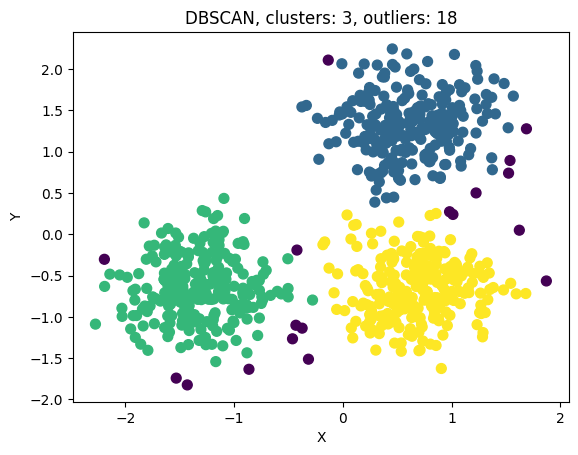

In [205]:
_ = plt.scatter(X[:, 0], X[:, 1], s=50, c=labels.astype(float))
_ = plt.title(
    'DBSCAN, clusters: %d, outliers: %d' % 
    (n_clusters, len(outliers))
)
_ = plt.xlabel('X')
_ = plt.ylabel('Y')

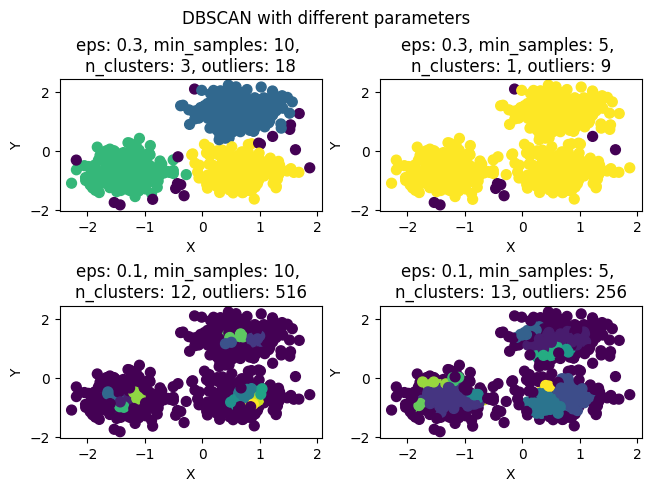

In [206]:
_, axes = plt.subplots(2, 2, constrained_layout=True)
for row, col, eps, min_samples in [
    (0, 0, .3, 10), 
    (0, 1, .3, 5), 
    (1, 0, .1, 10), 
    (1, 1, .1, 5)
]:
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = db.labels_
    outliers = X[labels == -1]
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    axes[row, col].scatter(X[:, 0], X[:, 1], s=50, c=db.labels_.astype(float))
    axes[row, col].set_title(
        'eps: %.1f, min_samples: %d, \nn_clusters: %d, outliers: %d' % 
        (eps, min_samples, n_clusters, len(outliers))
    )
    axes[row, col].set_xlabel('X')
    axes[row, col].set_ylabel('Y')
_ = plt.suptitle('DBSCAN with different parameters')
